___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
# CODE HERE

In [6]:
df.isnull().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# CODE HERE

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

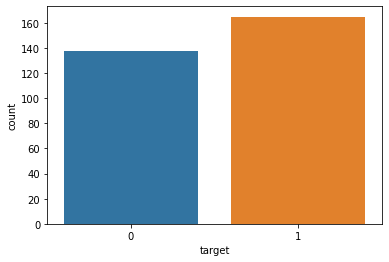

In [10]:
# CODE HERE!
#sns.countplot(data = df,x = 'target') - both work
sns.countplot(data = df,x = df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

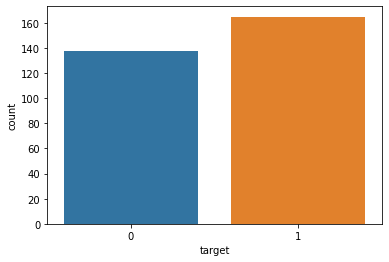

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

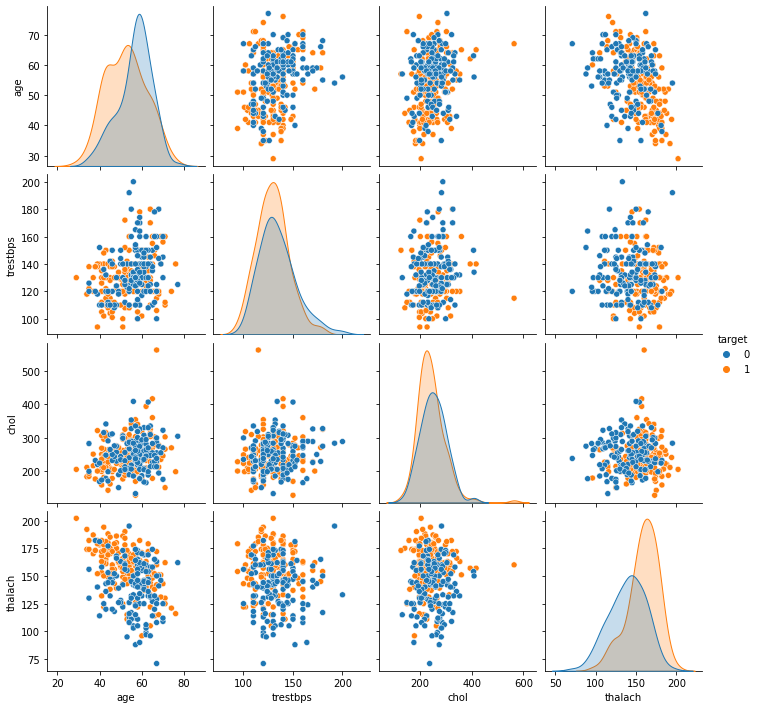

In [11]:
# CODE HERE
sns.pairplot(data= df,  vars= ['age','trestbps', 'chol','thalach'],hue='target' )

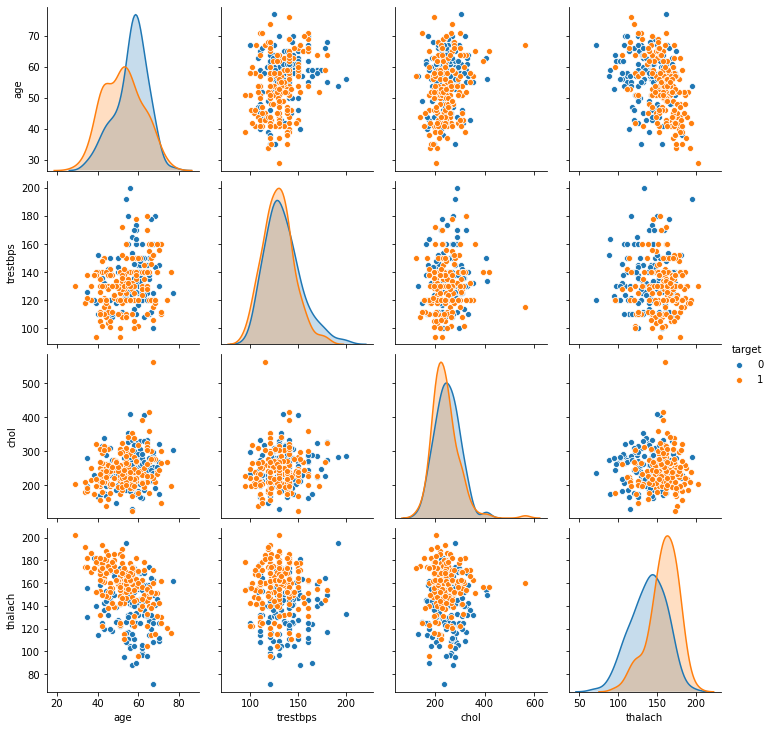

**TASK: Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

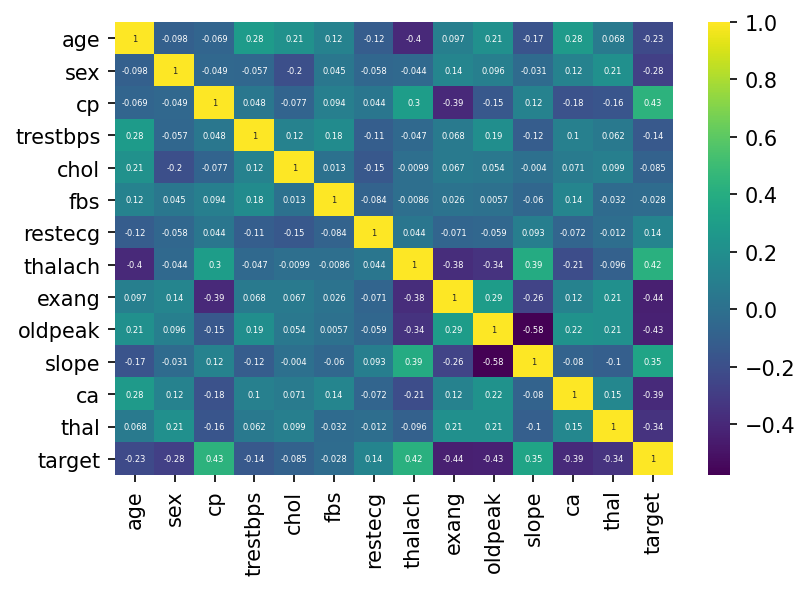

In [12]:
# CODE HERE
plt.figure(dpi= 150)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":4},cmap='viridis')

<AxesSubplot:>

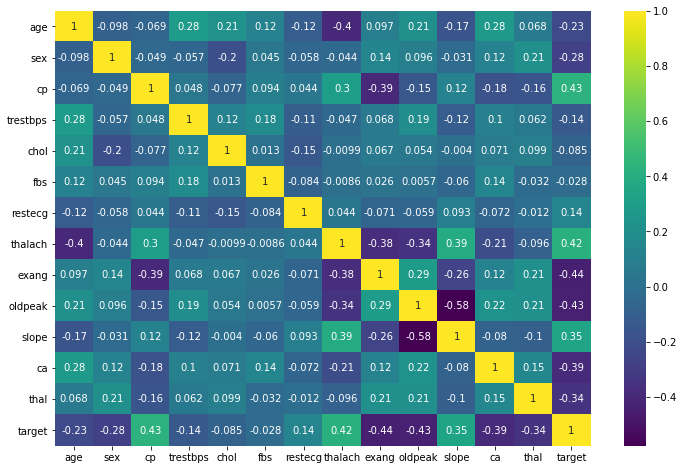

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [128]:
# CODE HERE
## CREATE X and y
X = df.drop('target',axis=1)
y = df['target'] #scikit ok with the labels for y being strings, 
                  #no need to change to int or onehot code

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [18]:
# CODE HERE

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [21]:
# CODE HERE

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [129]:
# CODE HERE
from sklearn.linear_model import LogisticRegressionCV

In [130]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20) #alpha value for regularization


param_grid = {'penalty': penalty,'l1_ratio': l1_ratio,'C': C}

In [131]:
log_model = LogisticRegressionCV(solver = 'saga',penalty='elasticnet', l1_ratios = l1_ratio,Cs=C)

In [34]:
 help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  
 

In [132]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                     l1_ratios=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                     penalty='elasticnet', solver='saga')

In [133]:
log_model.coef_

array([[-0.05809278, -0.71306548,  0.89028247, -0.24904531, -0.19762116,
         0.02100938,  0.10609064,  0.42675515, -0.41689687, -0.52474793,
         0.36813057, -0.8402977 , -0.5686357 ]])

In [134]:
log_model

LogisticRegressionCV(Cs=array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                     l1_ratios=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                     penalty='elasticnet', solver='saga')

LogisticRegressionCV()

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [204]:
# CODE HERE
log_model.C_

array([1.])

In [205]:
log_model.Cs_

array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10])

In [207]:
log_model.get_params()

{'Cs': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
        1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
        1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
        2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
        2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**TASK: Report back the model's coefficients.**

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

In [141]:
#CODE HERE
alist=[]
for i in range(0,len(log_model.coef_[0])):
    alist.append(log_model.coef_[0][i])

In [144]:
np.vstack((ss,alist))

array([['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
       [-0.058092779041489045, -0.713065475931769, 0.890282468796294,
        -0.2490453063145896, -0.19762116318898745, 0.0210093836380578,
        0.10609064061862493, 0.4267551498615543, -0.416896873404833,
        -0.524747934604338, 0.3681305719094591, -0.8402976962378955,
        -0.5686356979720224]], dtype=object)

In [148]:
ser = pd.DataFrame(np.vstack((ss,alist)))

In [152]:
ser =ser.rename(columns=ser.iloc[0]).drop(ser.index[0])


In [175]:
serr = ser.transpose().sort_values(1)

In [180]:
serr2 = serr.transpose()

In [181]:
serr2

,ca,sex,thal,oldpeak,exang,trestbps,chol,age,fbs,restecg,slope,thalach,cp
1,-0.840298,-0.713065,-0.568636,-0.524748,-0.416897,-0.249045,-0.197621,-0.058093,0.021009,0.106091,0.368131,0.426755,0.890282


In [166]:
kk = ser.iloc[0]

In [136]:
q = sorted(alist)#sort(reverse=False)

In [137]:
q

[-0.8402976962378955,
 -0.713065475931769,
 -0.5686356979720224,
 -0.524747934604338,
 -0.416896873404833,
 -0.2490453063145896,
 -0.19762116318898745,
 -0.058092779041489045,
 0.0210093836380578,
 0.10609064061862493,
 0.3681305719094591,
 0.4267551498615543,
 0.890282468796294]

In [138]:
ss= df.drop('target',axis=1).columns

<AxesSubplot:>

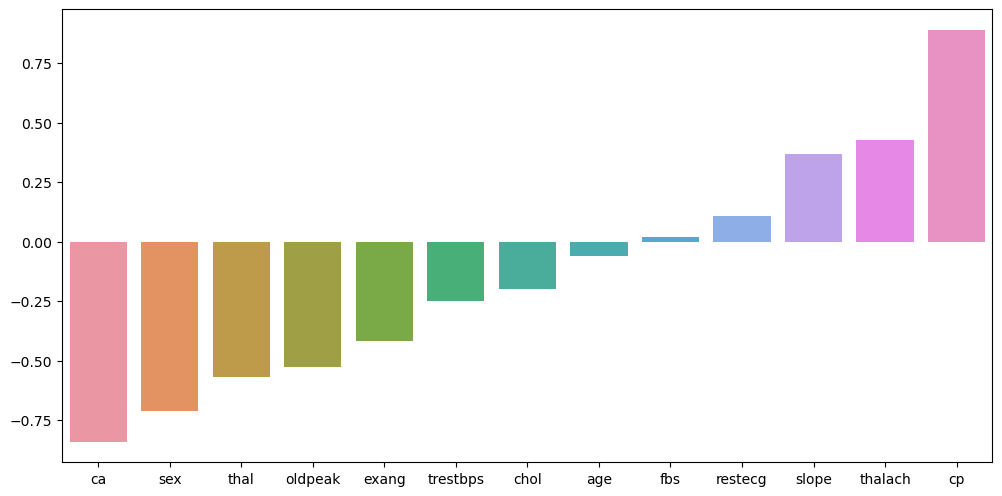

In [184]:
plt.figure(dpi=100,figsize=(12,6))
#plt.set_xticklabels(plt.get_xmajorticklabels(), fontsize = 18)


sns.barplot(data=serr2)

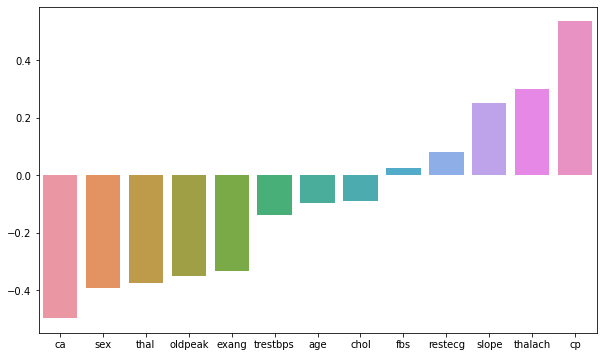

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [185]:
y_pred = log_model.predict(scaled_X_test)


In [186]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [187]:
# CODE HERE
accuracy_score(y_test,y_pred)

0.8387096774193549

In [188]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [189]:
from sklearn.metrics import plot_confusion_matrix

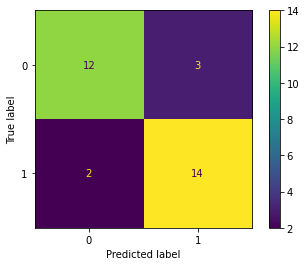

In [190]:
# CODE HERE
plot_confusion_matrix(log_model,scaled_X_test,y_test)

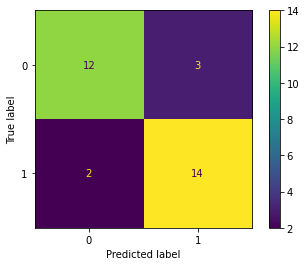

In [191]:
# CODE HERE
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [192]:
# CODE HERE
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred)

0.8235294117647058

In [193]:
recall_score(y_test,y_pred)

0.875

In [194]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

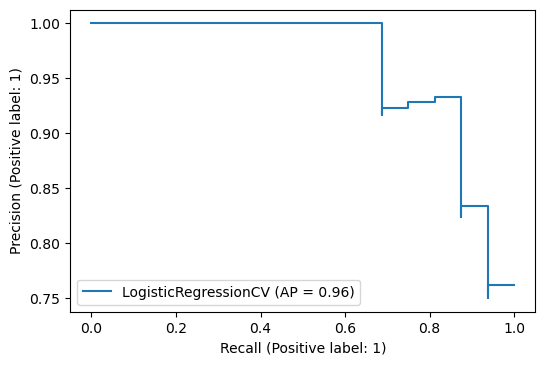

In [197]:
fig,ax = plt.subplots(dpi=100)
plot_precision_recall_curve(log_model,scaled_X_test,y_test,ax=ax)

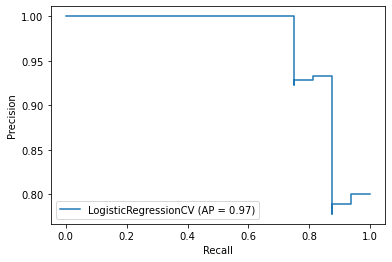

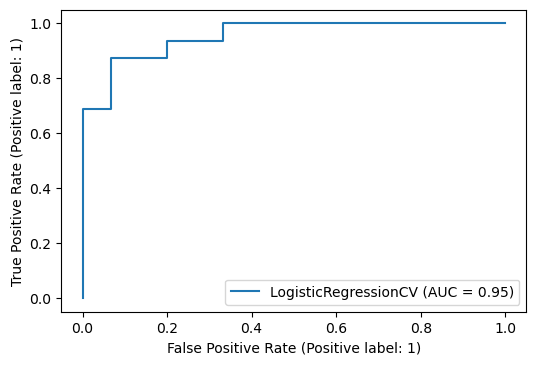

In [196]:
# CODE HERE
fig,ax = plt.subplots(dpi=100)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

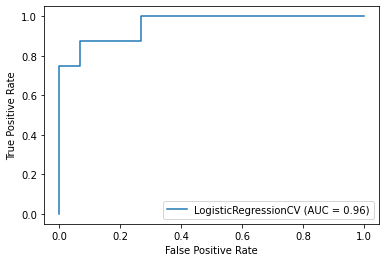

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [198]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [199]:
# CODE HERE
log_model.predict(patient)

array([0], dtype=int64)

In [71]:
# EXPECTED PREDICTION

array([0], dtype=int64)

In [202]:
log_model.predict_proba(patient)

array([[1.00000000e+00, 1.54091347e-20]])

In [72]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)

array([[9.99999862e-01, 1.38455917e-07]])

----

## Great Job!